# Implementando Decision Tree e Random Forest com o SkLearn

### carlosbaia.com

In [1]:
import pandas as pd
names = ['SepalLength', 'SepalWidth',
         'PetalLength', 'PetalWidth',
         'Class']
df = pd.read_csv('iris.data.txt', names=names)

In [2]:
print("Linhas: %d, Colunas: %d" % (len(df), len(df.columns)))

Linhas: 150, Colunas: 5


In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64

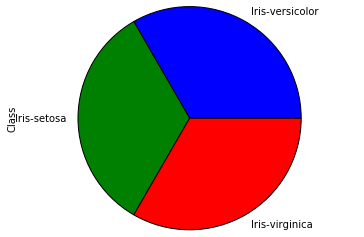

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='pie')
plt.axis('equal');

# Criando features

In [6]:
df['SepalArea'] = df['SepalLength'] * df['SepalWidth']
df['PetalArea'] = df['PetalLength'] * df['PetalWidth']

df['SepalLengthAboveMean'] = df['SepalLength'] > df['SepalLength'].mean()
df['SepalWidthAboveMean'] = df['SepalWidth'] > df['SepalWidth'].mean()

df['PetalLengthAboveMean'] = df['PetalLength'] > df['PetalLength'].mean()
df['PetalWidthAboveMean'] = df['PetalWidth'] > df['PetalWidth'].mean()

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


# Treinamento

In [7]:
# Preparando os dados
features = df.columns.difference(['Class'])

X = df[features].values
y = df['Class'].values

print(features)

Index(['PetalArea', 'PetalLength', 'PetalLengthAboveMean', 'PetalWidth',
       'PetalWidthAboveMean', 'SepalArea', 'SepalLength',
       'SepalLengthAboveMean', 'SepalWidth', 'SepalWidthAboveMean'],
      dtype='object')


## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3)
classifier_dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1986, splitter='best')

## Predicting samples

In [9]:
# Exemplos que serao utilizados para validar o modelo
sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]  # Iris-setosa
sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]   # Iris-versicolor
sample3 = [7.9, 5.0, 2.0, 1.8, 19.7, 9.1, True, False, True, True]     # Iris-virginica

classifier_dt.predict([sample1, sample2, sample3])  # Predizendo o tipo da flor

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.953333333333


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=50, max_depth=5, n_jobs=-1)
classifier_rf.fit(X, y)

scores_rf = cross_val_score(classifier_rf, X, y, scoring='accuracy', cv=5)
print(scores_rf.mean())

0.96


## Feature Importance

In [12]:
classifier_rf.fit(X, y)  # Treinando com tudo

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalArea: 31.614805%
PetalWidth: 29.375897%
PetalLength: 21.629776%
PetalLengthAboveMean: 7.188185%
SepalLength: 3.115694%
SepalArea: 2.513482%
SepalWidth: 1.804071%
PetalWidthAboveMean: 1.678833%
SepalLengthAboveMean: 0.853007%
SepalWidthAboveMean: 0.226249%


## Grid Search CV

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(classifier_rf, param_grid, scoring="accuracy")
grid_search.fit(X, y)

classifier_rf = grid_search.best_estimator_  # Pegando o melhor classificador

print(grid_search.best_score_)
print(grid_search.best_params_)

0.973333333333
{'max_depth': 10, 'bootstrap': False, 'max_features': 0.1, 'criterion': 'entropy', 'n_estimators': 25}
